**Topic:  Classification**

**Settings:  Where applicable, use test_size=.30, random_state=4444.  This will permit comparison of results across users.

**Data:**

Challenges 1-10:  congressional votes [Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

Challenge 11:     movie data

Challenge 12:     breast cancer surgery [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)


**Data â€“ Congressional Votes**

Download the congressional votes data from here:[Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)


In [3]:
df = pd.read_csv('./data/house-votes-84.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat.
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat.


In [4]:
def numericYN(s):
    if s == 'n':
        return 0
    elif s == 'y':
        return 1
    else:
        pass

X = df.iloc[:,:-1].applymap(numericYN)
X.head()

# X = df.iloc[:,:-1]
# X = X.replace('y',float(1.0))
# X = X.replace('n',float(0.0))
# X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [5]:
X = X.apply(lambda col: col.fillna(col.mean()),axis=0)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [6]:
y = df.iloc[:,-1]
y = y.map(lambda s: s[:3])
y.head()

0    rep
1    rep
2    dem
3    dem
4    dem
Name: 16, dtype: object

In [7]:
y.value_counts()

dem    267
rep    168
Name: 16, dtype: int64

**Challenge 2**

Split the data into a test and training set. Use this function:

```
from sklearn.cross_validation import train_test_split
```

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.30, random_state=4444)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

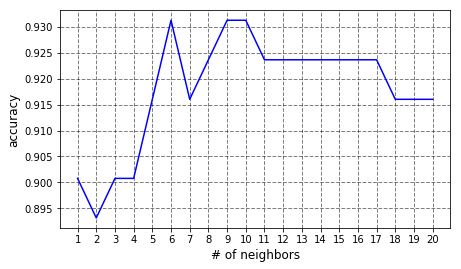

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
nb_num = range(1,21)
for k in nb_num:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
#     print(k,accuracy_score(y_test, y_pred))


fig,ax = plt.subplots(1,1,figsize=(7,4));
ax.plot(nb_num,scores,'b')
ax.set_xticks(nb_num);
ax.grid(color='k', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('# of neighbors',fontsize=12);
ax.set_ylabel('accuracy',fontsize=12);


**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [12]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Could be a typical function for classifying:

def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=4444)
#     ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.98
Test Data Accuracy:     0.94
[[75  2]
 [ 6 48]]


Precision:              0.93
Recall:                 0.97


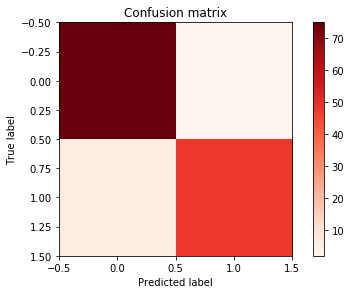

In [13]:
log_clf=LogisticRegression()
train_score(log_clf,X,y)

**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

Text(0.5,0,'Number of People')

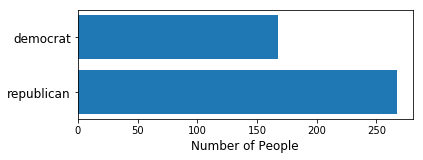

In [14]:
fig,ax = plt.subplots(1,1,figsize=(6,2));
ax.barh(y=y.value_counts().index, width=y.value_counts());
ax.set_yticklabels(['republican','democrat'],fontsize=12)
ax.set_xlabel('Number of People',fontsize=12)

In [21]:
# define functions to make simple predictions
def predict_dem(X): #predict "democrat" all time
    return(['dem' for x in range(len(X))])
def predict_rep(X): #predict "republican" all time
    return(['rep' for x in range(len(X))])

[[267   0]
 [168   0]]


Precision:              0.61
Recall:                 1.00


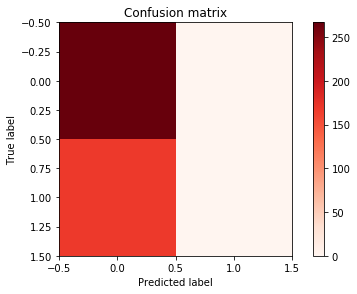

In [22]:
# calculate metrics for predicting "democrat" all time
y_true = y
y_pred = predict_dem(X)
conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))

cm=confusion_matrix(y_true, y_pred, labels=None)

plt.figure()
plot_confusion_matrix(cm)

[[  0 267]
 [  0 168]]


Precision:              nan
Recall:                 0.00


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


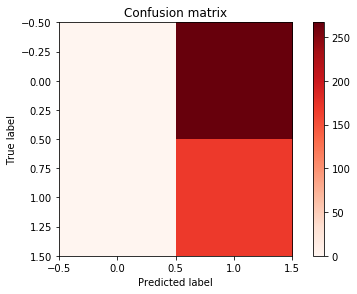

In [23]:
# calculate metrics for predicting "republican" all time
y_true = y
y_pred = predict_rep(X)
conf = confusion_matrix(y_true, y_pred)
print(conf)

print ('\n')
print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))

cm=confusion_matrix(y_true, y_pred, labels=None)

plt.figure()
plot_confusion_matrix(cm)

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

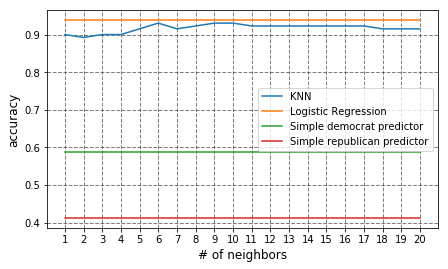

In [27]:
# get scores for KNN
scores = []
nb_num = range(1,21)
for k in nb_num:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
#     print(k,accuracy_score(y_test, y_pred))

# get score from logistic regression
log_clf=LogisticRegression()
log_clf.fit(X_train,y_train)
score_lr = log_clf.score(X_test,y_test)

# get score from simple democrat predictor
y_true = y_test
y_pred = predict_dem(X_test)
conf = confusion_matrix(y_true, y_pred)
score_dem = (conf[0,0] + conf[1,1])/conf.sum()

# get score from simple republican predictor
y_true = y_test
y_pred = predict_rep(X_test)
conf = confusion_matrix(y_true, y_pred)
score_rep = (conf[0,0] + conf[1,1])/conf.sum()



fig,ax = plt.subplots(1,1,figsize=(7,4));
ax.plot(nb_num,scores)
ax.plot(nb_num,[score_lr for i in range(len(nb_num))])
ax.plot(nb_num,[score_dem for i in range(len(nb_num))])
ax.plot(nb_num,[score_rep for i in range(len(nb_num))])
ax.set_xticks(nb_num);
ax.grid(color='k', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('# of neighbors',fontsize=12);
ax.set_ylabel('accuracy',fontsize=12);
ax.legend(['KNN','Logistic Regression','Simple democrat predictor','Simple republican predictor'])

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [29]:
from sklearn.model_selection import learning_curve

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples (m)")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes*len(y), train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes*len(y), test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes*len(y), train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes*len(y), test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

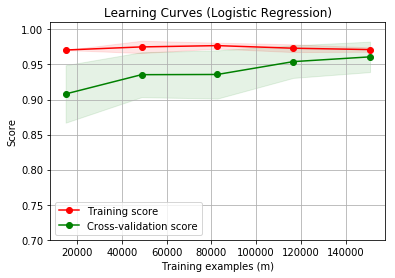

In [36]:
title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=4)

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

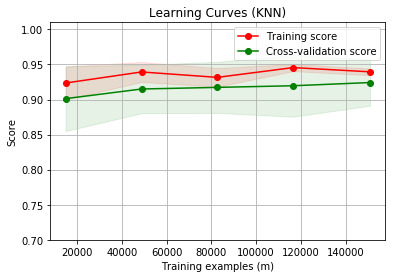

In [38]:
title = "Learning Curves (KNN)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
estimator = KNeighborsClassifier(n_neighbors=9)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=4)

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.